 <h1>Including Necessary libraries</h1>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

<h1>Importing Dataset</h1>

In [ ]:
# reading data from excel sheet
soil_data = pd.read_excel('soil_data.xlsx',header=None)

# Viewing first few rows of dataset
soil_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,Metadata - Soils Collection and Lab (Kuo) Anal...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Sample,DIR.,INT/EXT,Sub- Sample #,Date,Time,Latitude,Longitude,Slope,Aspect,% Veg. Cover,NO3-N (ppm),NH4-N (ppm),P Bicar (ppm),K Acet (ppm),SO4-S (ppm),B (ppm),Organic Matter %,pH,Zn (ppm),Cu (ppm),Fe (ppm),Ca (meq/100g),Mg (meq/100g),Na (meq/100g)
2,1,NW,INT,1,2012-06-04 00:00:00,13:50:00,N25.77485,W171.73539,2,92,100,23,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
3,2,NW,INT,2,2012-06-04 00:00:00,14:43:00,N25.77774,W171.73643,1,167,95,6,0.75,58,10,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
4,3,NW,INT,3,2012-06-04 00:00:00,14:10:00,N25.77628,W171.73480,5,75,98,7.25,1,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,Longitude,Longitude for sample location in decimal degrees,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
418,Slope,"Slope of the ground at sample location, in deg...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
419,Aspect,"Directoin the slope face at sample location, i...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,% Veg. Cover,Percent vegetative cover of the 102m area surr...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h1>Preprocessing Data</h1>

In [ ]:
# removing unnecessary columns and rows that do not contains data
soil_data = soil_data.drop(np.arange(310,322),axis=0)
soil_data = soil_data.drop([0,1],axis=0)
soil_data = soil_data.drop(np.arange(0,10),axis=1)

#renaming column names and units of each attributes
column_names = ['Vegetation Cover','NO3','NH4','P','K','SO4','B','Organic Matter','pH','Zn','Cu','Fe','Ca','Mg','Na']
attribute_units = ['%age','ppm','ppm','ppm','ppm','ppm','ppm',"%age",'pH','ppm','ppm','ppm','meq/100g','meq/100g','meq/100g']


#assuring length of column and attribute_units is same
assert(len(attribute_units) == len(column_names))


#creating new dataframe with column name
soil_data = pd.DataFrame(soil_data.values,columns=column_names)

#viewing final data frame
soil_data.head()


,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6,0.75,58,10,7,0.27,0.3,8.2,0.8,0.1,1,5,0.5,0.07
2,98,7.25,1,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.1
4,15,1.75,0.5,17,4,6,0.25,0.1,8.8,0.3,0.1,1,4.7,0.5,0.1


In [ ]:
soil_data.isna().sum()

Vegetation Cover    25
NO3                 26
NH4                 14
P                   18
K                   17
SO4                 13
B                   14
Organic Matter      14
pH                  15
Zn                  17
Cu                  13
Fe                  13
Ca                  14
Mg                  12
Na                  18
dtype: int64

In [ ]:
soil_data.fillna(0)

,Vegetation Cover,NO3,NH4,P,K,SO4,B,Organic Matter,pH,Zn,Cu,Fe,Ca,Mg,Na
0,100,23.00,2.25,101,32,12,0.71,0.96,7.8,1.7,0.3,4,6.6,0.8,0.12
1,95,6.00,0.75,58,10,7,0.27,0.30,8.2,0.8,0.1,1,5.0,0.5,0.07
2,98,7.25,1.00,115,8,10,0.56,0.62,7.9,1.4,0.2,2,5.2,0.4,0.04
3,100,21.00,1.25,130,30,13,0.78,1.04,7.9,1.8,0.3,2,6.1,0.7,0.10
4,15,1.75,0.50,17,4,6,0.25,0.10,8.8,0.3,0.1,1,4.7,0.5,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,0,0.00,0.00,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.00
404,0,0.00,0.00,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.00
405,0,0.00,0.00,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.00
406,0,0.00,0.00,0,0,0,0.00,0.00,0.0,0.0,0.0,0,0.0,0.0,0.00


In [ ]:
from numpy import nan
from numpy import isnan
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=nan, strategy='median')
# transform the dataset
transformed_values = imputer.fit_transform(soil_data)
# count the number of NaN values in each column
print('Missing: %d' % isnan(transformed_values).sum())

Missing: 0


In [ ]:
soil_data= pd.DataFrame(transformed_values,columns=column_names)
soil_data.isna().sum()

Vegetation Cover    0
NO3                 0
NH4                 0
P                   0
K                   0
SO4                 0
B                   0
Organic Matter      0
pH                  0
Zn                  0
Cu                  0
Fe                  0
Ca                  0
Mg                  0
Na                  0
dtype: int64

Saving the Preprocessed Data set

In [ ]:
soil_data.to_csv(r'processed_data_set.csv', index=False)

<h1>Data Visualization</h1>

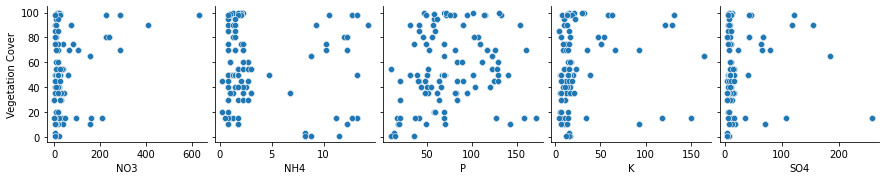

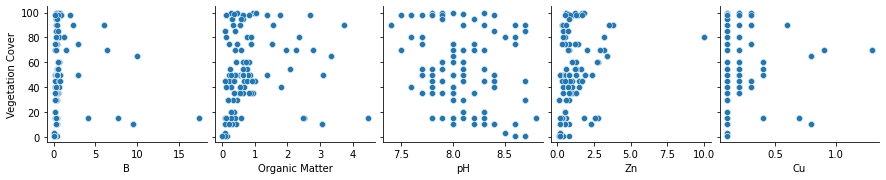

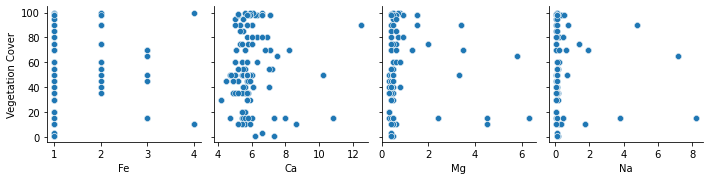

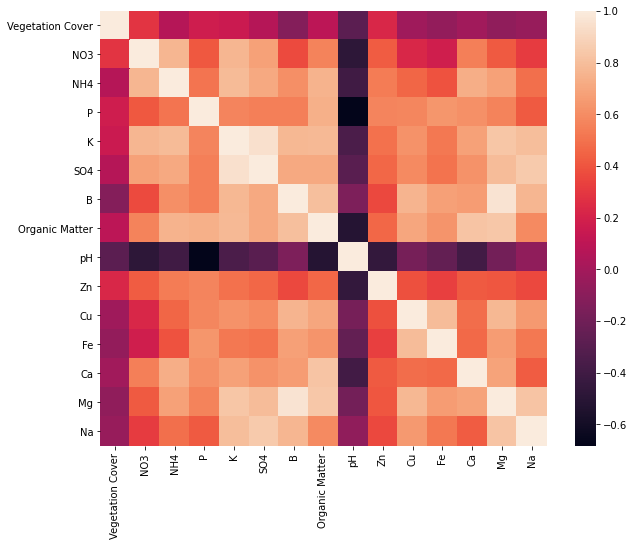

In [ ]:
import seaborn as sns


#pair plots
pairplot1 = sns.pairplot(soil_data,x_vars=soil_data.columns[1:6],y_vars=['Vegetation Cover'])
plt.show()

pairplot2 = sns.pairplot(soil_data,x_vars=soil_data.columns[6:11],y_vars=['Vegetation Cover'])
plt.show()

pairplot3 = sns.pairplot(soil_data,x_vars=soil_data.columns[11:15],y_vars=['Vegetation Cover'])
plt.show()




# getting coeralation values
values = soil_data.corr()
# plotting values
plt.figure(figsize=(10,8))
sns.heatmap(values,annot=False)

<h1>Visualizing result of corelation matrix</h1>

It is clear from above matrix that Vegetation Cover is highly depends on pH.

 <h1>Reading processed data</h1>

In [ ]:
import pandas as pd
import numpy as np


X, Y = soil_data[soil_data.columns[1:]], soil_data['Vegetation Cover']


print(X[:10])
print(X)
# Normalizing data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X, Y = scaler.fit_transform(X.values), scaler.fit_transform(Y.values.reshape(-1,1))
print(X[0])

     NO3   NH4      P     K   SO4     B  ...   Zn   Cu   Fe   Ca   Mg    Na
0  23.00  2.25  101.0  32.0  12.0  0.71  ...  1.7  0.3  4.0  6.6  0.8  0.12
1   6.00  0.75   58.0  10.0   7.0  0.27  ...  0.8  0.1  1.0  5.0  0.5  0.07
2   7.25  1.00  115.0   8.0  10.0  0.56  ...  1.4  0.2  2.0  5.2  0.4  0.04
3  21.00  1.25  130.0  30.0  13.0  0.78  ...  1.8  0.3  2.0  6.1  0.7  0.10
4   1.75  0.50   17.0   4.0   6.0  0.25  ...  0.3  0.1  1.0  4.7  0.5  0.10
5   2.00  0.75   40.0   8.0   6.0  0.24  ...  0.9  0.1  1.0  4.9  0.5  0.09
6   1.50  0.25   21.0  12.0   5.0  0.20  ...  0.3  0.1  1.0  5.7  0.4  0.08
7  14.75  0.75   53.0  12.0   8.0  0.18  ...  0.8  0.1  1.0  5.6  0.4  0.07
8  12.75  2.00   72.0  15.0  10.0  0.64  ...  1.2  0.2  2.0  5.6  0.5  0.08
9  18.50  1.75   47.0  21.0   7.0  0.29  ...  0.6  0.1  1.0  5.9  0.5  0.11

[10 rows x 14 columns]
       NO3   NH4      P     K   SO4      B  ...   Zn   Cu   Fe   Ca   Mg    Na
0    23.00  2.25  101.0  32.0  12.0  0.710  ...  1.7  0.3  4.

<h1>Implementing ML models</h1>

<h3>Useful functions to implement a general model</h3>

In [ ]:
from sklearn.metrics import r2_score

def train(model, X, Y):
    model.fit(X,Y)
    return model

def print_metrics(model, X, Y):
    
    # predicted test data
    y_pred = model.predict(X)
    
    # Mean square Error
    mean_square_error = np.sum((y_pred-Y)**2)/len(y_pred)
    print('Mean Square Error : ', mean_square_error)
    
    # Root Mean Square Error
    print('Root Mean Square Error : ', mean_square_error**0.5)
    
    # Mean absolute Error
    print('Mean Absolute Error : ', np.abs(Y - y_pred).sum()/len(y_pred))
    
    # R2 Score
    print('R2 Score : ', r2_score(Y, y_pred))

    print('Accuracy : ',model.score(X,Y))
    

<h3>Spliting data into train and test set</h3>

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.10, random_state=43)
print(X_train)

[[0.04143646 0.17857143 0.33540373 ... 0.18072289 0.01666667 0.002442  ]
 [0.24309392 0.60714286 0.69565217 ... 0.39759036 0.91666667 0.87545788]
 [0.01144436 0.03571429 0.36645963 ... 0.1686747  0.         0.        ]
 ...
 [0.04459353 0.46428571 0.52795031 ... 0.18072289 0.03333333 0.01098901]
 [0.24664562 0.85714286 0.82608696 ... 0.53012048 0.7        0.20757021]
 [0.35280189 0.73214286 0.75776398 ... 0.25301205 0.2        0.05494505]]


<h2>Implement Linear Model</h2>


In [ ]:
from sklearn.linear_model import LinearRegression
linearModel = LinearRegression()

# training
linearModel = train(linearModel,X_train,Y_train)

#print metrics
print_metrics(linearModel, X_test, Y_test)


with open('Linear Model','wb') as f:
  pickle.dump(linearModel,f)

Mean Square Error :  0.06408862709336129
Root Mean Square Error :  0.25315731688687426
Mean Absolute Error :  0.22957674983558457
R2 Score :  0.1239426007049349
Accuracy :  0.1239426007049349


<h2>Implement SVR</h2>

In [ ]:
from sklearn.svm import SVR


# linear Model
svr_linear = SVR(kernel='linear', C=10, epsilon=0.4)

# RBF kernel
svr_rbf = SVR(kernel='rbf', C=10, gamma=1)

# non-linear model
svr_poly = SVR(kernel='poly', degree=2, C=650, epsilon=0.3)


print('Kernel : Linear')
svr_linear = train(svr_linear,X_train,Y_train)
print_metrics(svr_linear, X_test, Y_test)

with open('SVR (Linear)','wb') as f:
  pickle.dump(svr_linear,f)

print('\n')
print('Kernel : RBF')
svr_rbf = train(svr_rbf,X_train,Y_train)
print_metrics(svr_rbf, X_test, Y_test)

with open('SVR (RBF)','wb') as f:
  pickle.dump(svr_rbf,f)

print("\n")
print('Kernel : Poly')
svr_poly = train(svr_poly,X_train,Y_train)
print_metrics(svr_poly, X_test, Y_test)

with open('SVR (Poly)','wb') as f:
  pickle.dump(svr_poly,f)

Kernel : Linear
Mean Square Error :  3.5480091480607845
Root Mean Square Error :  1.8836159768012122
Mean Absolute Error :  10.095033264191088
R2 Score :  0.09024684710747155
Accuracy :  0.09024684710747156


Kernel : RBF
Mean Square Error :  4.659727530982829
Root Mean Square Error :  2.158640204152334
Mean Absolute Error :  11.31482638832509
R2 Score :  0.7080870518709772
Accuracy :  0.7080870518709773


Kernel : Poly


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error :  4.797822240899022
Root Mean Square Error :  2.1903931703917956
Mean Absolute Error :  11.430535210079025
R2 Score :  0.16107967119463518
Accuracy :  0.16107967119463518


<h2>DecisionTreeRegressor</h2>

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeRegressor

treeRegressor = DecisionTreeRegressor(criterion='mse', max_depth=8, min_samples_leaf=5)

#training
treeRegressor = train(treeRegressor, X_train, Y_train)

#print metrics
print_metrics(treeRegressor, X_test, Y_test)
#print(export_graphviz(treeRegressor))
with open('Decision Tree Regression','wb') as f:
  pickle.dump(treeRegressor,f)

Mean Square Error :  5.8652772331021374
Root Mean Square Error :  2.421833444541994
Mean Absolute Error :  12.687004706560867
R2 Score :  0.8326677685995288
Accuracy :  0.832667768599529


<h2>Implement Random Forest Regressor</h2>

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forestRegressor = RandomForestRegressor(criterion='mse', max_depth=7, n_estimators=10, random_state=0)

#training 
forestRegressor = train(forestRegressor, X_train, Y_train)
#print metrics
print_metrics(forestRegressor, X_test, Y_test)

with open('Random Forest Regression','wb') as f:
  pickle.dump(forestRegressor,f)


Mean Square Error :  5.349288860203913
Root Mean Square Error :  2.3128529698629596
Mean Absolute Error :  12.040661337831951
R2 Score :  0.9296642913809817
Accuracy :  0.9296642913809817


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
